# 神经网络深度学习(TensorFlow/Keras)




## 神经网络基础




　在进入各种具体使用之前，理清一些相关的基本概念。


### 神经网络(Neural Network)



　神经网络（Neural Network，NN)在机器学习和认知科学领域，是一种模仿生物神经网络的结构和功能的数学模型，用于对函数进行估计或近似。神经网络由大量的人工神经元联结进行计算。大多数情况下人工神经网络能在外界信息的基础上改变内部结构，是一种自适应系统，通俗的讲就是具备学习功能。

　神经网络可分为通过输入正确答案针对问题进行了优化的监督学习和不需要教师信号的无监督学习。本质上，两种学习是等价的。 已经证明，具有三层以上的神经网络可以近似可微的任意连续函数。在许多情况下，对于无法通过多维数据（例如图像和统计数据）线性分离的问题，可以通过相对少量的计算来获得良好的解。


### 深度学习(Deep learning)


　深度学习的概念源于人工神经网络的研究，含多个隐藏层的多层感知器就是一种深度学习结构。深度学习通过组合低层特征形成更加抽象的高层表示属性类别或特征，以发现数据的分布式特征表示。研究深度学习的动机在于建立模拟人脑进行分析学习的神经网络，它模仿人脑的机制来解释数据，例如图像，声音和文本等。


### TensorFlow



　TensorFlow是开源数学计算引擎，由Google开发，API是Python的，底层是C++。可以在单个CPU或GPU，移动设备以及大规模分布式系统中使用。



### Keras


　Keras可以基于Theano或TensorFlow建立深度学习模型，方便研究和开发。Keras可以在Python 2.7或3.5运行，无痛调用后端的CPU或GPU网络。Keras由Google的Francois Chollet开发，遵循以下原则:

     模块化：每个模块都是单独的流程或图，深度学习的所有问题都可以通过组装模块解决
     简单化：提供解决问题的最简单办法，不加装饰，最大化可读性
     扩展性：新模块的添加特别容易，方便试验新想法
     Python：不使用任何自创格式，只使用原生Python



### 从Iris数据集为例看神经网络和深度学习机制




　Iris数据中有4个特征量，将其他作为输入。神经网络算法如下图所述。

![shiki](img/news012_network1.jpg)





图中，圆圈称为节点，而连接节点的线称为边缘。

　Iris数据的四个特征量，分别用x1，...，x4表示。这些节点称为输入层。下一层称为中间层，用v1，...，v4表示。
权重与每个边缘相关联，从xi到vj的权重为w(1)ij。v1的值，是x1到x4的权重和加偏置项b(1)1。此处的激活函数为h1。

算式如下:


![shiki](img/news012_shiki1.jpg)


其中激活函数h(1)

此处的激活函数h(1)通常称为ReLU(线性整流函数)。 ReLU如下定义。


![shiki](img/news012_shiki4.jpg)


中间层到输出层的计算类似地由加权线性和与激活函数的组合定义。

当从节点vi到yj的权重为w(2)ij时，yj表示如下：

![shiki](img/news012_shiki2.jpg)

Yj是输出层，经常使用softmax函数作为激活函数。此时softmax函数如下定义：


![shiki](img/news012_shiki3.jpg)



　用v1，v2，v3的值来表示vj更直观，但考虑到其它各层，统一用是softmax(vj; v1，v2，v3)来描述。。
最终进行分类时，取y1，y2和y3的最大值作为标签。这种，在n各输出变量中求最大值索引值的手法，称为OneHotEncoder(热编码).在训练阶段，神经网络使用训练数据调整加权因子w和偏差项b的值，似的输出尽可能正确。此处不讨论用于调整参数算法的细节。

　通过Iris数据集说明了神经网络的机制。在Iris数据中，输入层节点和输出层节点的所有组合都是相连的。通常，在考虑数据的属性时，要考虑各个节点的相互关系，节点连接意味着变量间存在依赖。权重与边缘增加，计算量也随之增加。当输入是图像数据时，输入节点数通常是像素数或者是3倍像素数(RGB)，输入层和中间层的节点如果全部相连，则边的数量将非常庞大。

　中间节点数可以自由决定，通常通过实验确定合适数目。Iris数据，只有一个中间层，通常情况可能会有多个中间层。
此方式，有多个中间层的神经网络进行的学习称为深度学习。

　综上所述，在开始训练学习之前，需确定网络的结构，包括中间层的数量，节点的数量，边缘连接等。



### 实现Iris的数据分类



准备数据。

In [1]:
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

　Iris数据随机排列，取20％用于测试，其余训练用。创建一个神经网络模型。



In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])


　tf.keras.models.Sequential类表示按层序定义网络。

　tf.keras.layers.Dense(4, activation=tf.nn.relu)对应于输入层连接中间层。 Dense类表示它与上层紧密耦合
(即，与上层的每个节点对都有一条边)。Dense的第一个参数表下一层中的节点数。activation是激活函数，这里使用ReLU。

　tf.keras.layers.Dense(3, activation=tf.nn.softmax)是输出层的定义。与中间层紧密连接。激活函数是softmax，如上所述，在输出层中经常使用softmax，输出是OneHotEncoder。

下图显示代码与网络图之间的关系。


![shiki](img/news012_network2.jpg)


定义网络后，指定损失函数和优化算法并进行编译。

In [3]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

　optimizer=adam，指定优化算法使用adam。这里不做说明，adam算法在多数情况下是一种有效的手法。
指定损失函数，loss=sparse_categorical_crossentropy。该例中，输出是OneHotEncoder，训练数据的标签是0到2的分类值。
metric=[accuracy]，指定在计算过程中显示的内容。accuracy是预测的准确性。


训练　计算测试数据的预测值



In [4]:
model.fit(X_train, y_train, epochs=500, verbose=0)

pred = model.predict(X_test).argmax(axis=1)
pred

array([2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

正解率

In [5]:
(pred == y_test).sum()/ len(pred)

0.9333333333333333

注意，训练过程中使用的是随机数，因此结果可能会有所不同。


## 画像の分類




　目前为止，一直使用Iris数据，一是因为它只需要简单的网络结构，二是因为在深度学习之前的经典算法中足够准确。 深度学习使得图像识别取得了长足的突破，下面，使用一个复杂的，经典的图像分类的数据。


### 图像分类数据集cifar10


这是一个著名的图像分类数据集cifar10。


In [6]:
(train_data, train_label), (test_data, test_label) \
    = tf.keras.datasets.cifar10.load_data()
train_data = train_data / 255
test_data = test_data / 255
train_label = train_label.ravel()
test_label = test_label.ravel()
train_data.shape

(50000, 32, 32, 3)

　下载cifar10数据，将训练数据存储在train_data、train_label中，测试数据存储在test_data、test_label)中。 train_data和test_data是特征量数据，即图像数据。原始数据是从0到255的像素RGB值，将其缩放到0到1之间。

　标签数据以二维数组的形式，用ravel转换为一维数组，方便后续处理。通过train_data.shape可以看到，train_data是一个4维数组，第一维表示图像数量，下两个维度对应于像素的坐标，最后一个维度是RGB。

　标签值是0到9之间的整数值，每个数字相对应的对象如下:

In [7]:
label_names = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]



在深度学习之前，看一下数据的内容，这是训练数据中每个标签10幅图像。


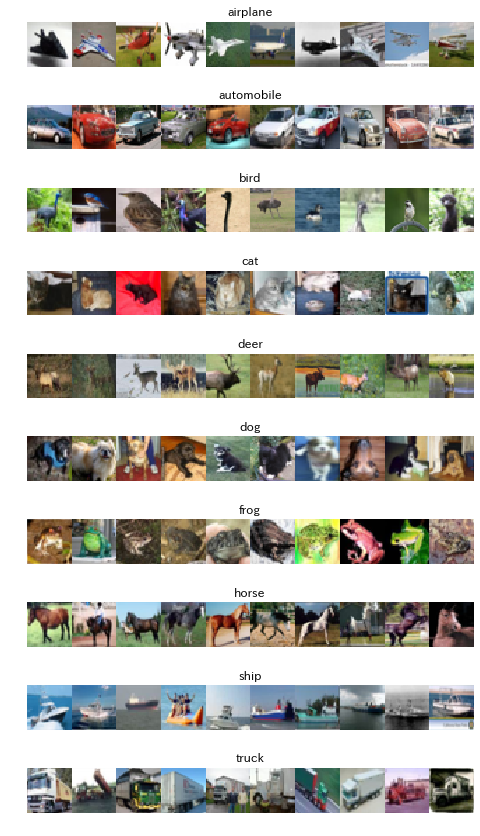

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(10, figsize=(8, 15))
for i in range(10):
    imgs = train_data[train_label == i][:10]
    axes[i].imshow(imgs.transpose(1, 0, 2, 3).reshape(32, 10 * 32, 3))
    axes[i].axis("off")
    axes[i].set_title(label_names[i])




### 卷积层和最大池层



　定义一个学习此网络。



In [9]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3),
                           input_shape=(32, 32, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(10, activation="softmax")
])


　在Iris中，使用Dense的类来连接上下层，但在cifar10中，每个图像数有32×32×3个数值，这样结合，计算成本过高。在此，采用卷积层和最大池层组合。这是图像识别中经常使用的技术。


　卷积层使用一种把固定大小的矩形(通常是正方形)中的点的权重总和分配给节点的机制。这种加权形式称为filter。filter从图像的左上方开始依次顺移覆盖整个图像，计算加权和。通常使用多个filter，分别计算其加权和。代码中，第一个参数Conv2D的参数，16表示过滤器的数量，第二个参数(3,3)是过滤器的尺寸。


![shiki](img/news012_convolution.jpg)



卷积层
　在poolMaxpool层分割与输入相同大小的像元，并将每个像元中点的最大值分配给节点。代码中指定为MaxPool2D的参数(2,2)表示单元格的大小。

![shiki](img/news012_maxpool.jpg)



最大池层
　操作卷积(Conv2D)和Maxpool(MaxPool2D)的操作执行了两次。在Flatten层，把二维数组转换为一维。Flatten层不执行数值计算，连接最后两层，输出层使用softmax函数进行一次OneHotEncoder热编码。



### 确认定义的网络结构



　使用summary确认定义的网络结构

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               590336    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total para


各层输出的大小和参数数量。指定优化算法和损失函数，与Iris数据集相同。

In [11]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', metrics=["accuracy"])




### 训练


　此过程需要几分钟时间。（过于耗时，epochs设为5次演示）




In [12]:
np.random.seed(1)
tf.set_random_seed(2)
model.fit(train_data,train_label, epochs=5)



Epoch 1/5
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3874 - acc: 0.5075
Epoch 2/5
50000/50000 [==============================] - 62s 1ms/step - loss: 1.1115 - acc: 0.6117
Epoch 3/5
50000/50000 [==============================] - 75s 2ms/step - loss: 1.0293 - acc: 0.6412
Epoch 4/5
50000/50000 [==============================] - 70s 1ms/step - loss: 0.9700 - acc: 0.6624
Epoch 5/5
50000/50000 [==============================] - 69s 1ms/step - loss: 0.9349 - acc: 0.6747


用HDF5格式，保存训练结果。

In [13]:
model.save("cifar10.h5")

如果出错了，检查系统是否安装了h5dy

> pip install h5py

In [14]:
model_loaded=tf.keras.models.load_model("cifar10.h5")

将训练后的模型从文件加载到model_loaded中。

### 执行结果


　与测试数据对比，检验结果。

In [15]:

pred = model_loaded.predict_classes(test_data)
(pred == test_label).sum() / len(test_label)


0.6543

正确率约为66％。下面是30个正确答案数据。

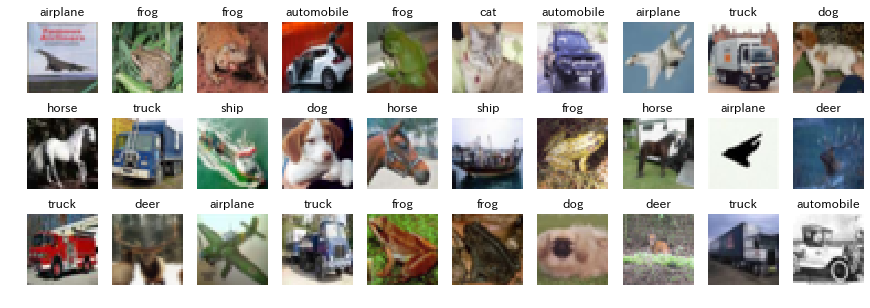

In [16]:
correct_data = test_data[pred == test_label]
correct_label = pred[pred == test_label]
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(30):
    ax = axes[i // 10][i % 10]
    ax.set_title(label_names[correct_label[i]])
    ax.axis("off")
    ax.imshow(correct_data[i])


不正确答案数据。

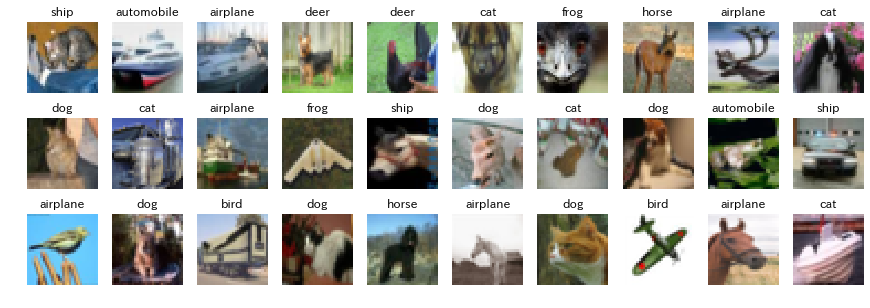

In [17]:
incorrect_data = test_data[pred != test_label]
incorrect_label = pred[pred != test_label]
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(30):
    ax = axes[i // 10][i % 10]
    ax.set_title(label_names[incorrect_label[i]])
    ax.axis("off")
    ax.imshow(incorrect_data[i])


　使用TensorFlow，实装了深度学习中的图像识别。为了说明方便，采用了最简洁的实现，所需计算时间也很短，所以准确率仅为60％左右。实际上，未来获得更高的准确率，则必须网络结构和算法上下功夫，当然，所需的计算资源也随之加大。

　可以在网上确认到精度最高的算法，截止到现在2018年10月，最高记录是2015年实现的96.53％的正确率。




## 总结



　通过Iris数据和图像数据的处理，了解了如何使用TensorFlow/Keras。

　深度学习可以应用许多领域，图像识别是其中的一个典型领域，可以立即感受到深度学习的威力。

　如何构建适合的模式，是实际可发运用中的一个最关键的问题，你可以从各种论文和书籍中获取信息。
